In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import pandas as pd
from scipy.stats import t
import numpy as np

In [5]:
#Reading Data
df = pd.read_csv("BTCUSD.csv")
#Last week data
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,Tweet_sentiment
0,23-09-2020,10539.45703,10637.84766,10185.77441,10225.86426,10225.86426,2.298673e+10,-1.0
1,24-09-2020,10227.47949,10765.79492,10215.20508,10745.54883,10745.54883,2.301754e+10,0.5
2,25-09-2020,10747.47266,10757.54883,10594.04785,10702.29004,10702.29004,2.123255e+10,0.5
3,26-09-2020,10702.23731,10778.50000,10682.08203,10754.43750,10754.43750,1.810501e+10,0.5
4,27-09-2020,10752.93945,10804.73242,10643.45801,10774.42676,10774.42676,1.801688e+10,0.0
5,28-09-2020,10771.64160,10949.12305,10716.67676,10721.32715,10721.32715,2.272037e+10,1.0
6,29-09-2020,10712.46289,10858.93945,10665.34473,10848.83008,10848.83008,2.045987e+10,1.0


In [6]:
#Old data
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweet_sentiment
361,19-09-2021,48268.85547,48328.36719,46919.80469,47260.21875,47260.21875,2.696772e+10,1.0
362,20-09-2021,47261.40625,47328.19922,42598.91406,42843.80078,42843.80078,4.390985e+10,1.0
363,21-09-2021,43012.23438,43607.60938,39787.60938,40693.67578,40693.67578,4.870109e+10,1.0
364,22-09-2021,40677.95313,43978.62109,40625.63281,43574.50781,43574.50781,3.813971e+10,1.0
365,23-09-2021,43551.96094,44316.50000,43182.21875,43726.50000,43726.50000,3.735559e+10,0.0


In [7]:
print(df.shape)
#including 0th index

(366, 8)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             366 non-null    object 
 1   Open             363 non-null    float64
 2   High             363 non-null    float64
 3   Low              363 non-null    float64
 4   Close            363 non-null    float64
 5   Adj Close        363 non-null    float64
 6   Volume           363 non-null    float64
 7   Tweet_sentiment  366 non-null    float64
dtypes: float64(7), object(1)
memory usage: 21.5+ KB


In [9]:
#Describing Data
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Tweet_sentiment
count,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02,366.000000
mean,37032.179772,38161.604232,35778.504200,37118.403512,37118.403512,4.696045e+10,0.317545
std,15021.305900,15406.188785,14505.669178,14963.895280,14963.895280,2.535446e+10,0.652298
min,10227.479490,10614.091800,10185.774410,10225.864260,10225.864260,1.709401e+10,-1.000000
25%,24269.390630,25714.085935,23993.181640,25468.542970,25468.542970,3.136906e+10,0.000000
50%,37371.031250,39242.484380,35717.722660,37345.121090,37345.121090,4.183109e+10,0.333333
75%,48905.240235,49831.392580,47161.548830,48908.937500,48908.937500,5.866296e+10,1.000000
max,63523.753910,64863.097660,62208.964840,63503.457030,63503.457030,3.509680e+11,1.000000


In [10]:
df.isnull().sum()

Date               0
Open               3
High               3
Low                3
Close              3
Adj Close          3
Volume             3
Tweet_sentiment    0
dtype: int64

In [11]:
df. dropna(subset = ["Open","High","Low","Close","Adj Close", "Volume"], inplace=True) 

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

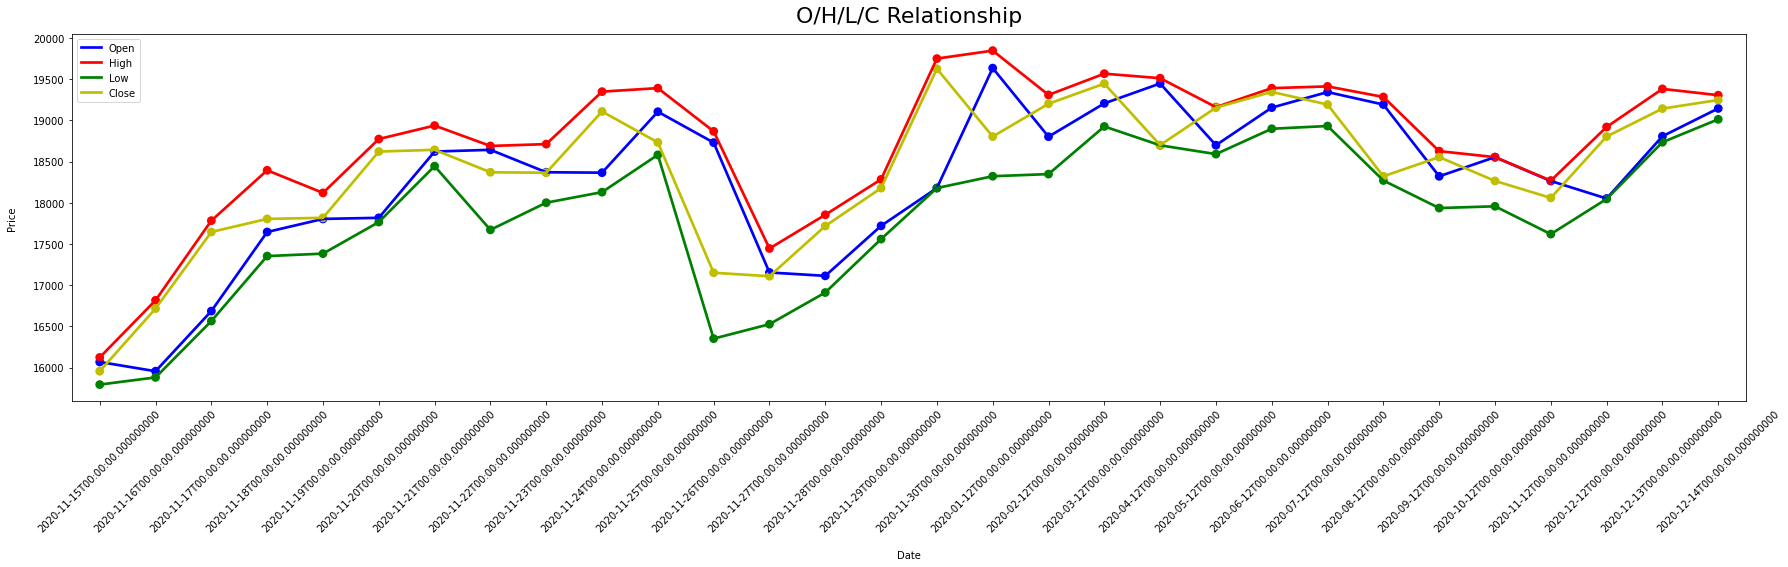

In [13]:
# relationship of open, high, low, close prices
df2=df[50:80]
fig, ax = plt.subplots(figsize=(25, 8))

sns.pointplot(data=df2, x='Date', y='Open', color="b", label='open')
sns.pointplot(data=df2, x='Date', y='High', color="r", label='high')
sns.pointplot(data=df2, x='Date', y='Low', color="g", label='low')
sns.pointplot(data=df2, x='Date', y='Close', color="y", label='close')

ax.legend(handles=ax.lines[::len(df2)+1], labels=["Open","High","Low","Close"])
ax.set_title('O/H/L/C Relationship', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Price', labelpad=16)


t=plt.xticks(rotation=45)
plt.tight_layout()

In [65]:
BTCUSD = pd.pivot_table(df, values = ["High", "Low", "Open", "Volume","Adj Close","Tweet_sentiment"],index = "Date", aggfunc=max)
BTCUSD["Profit/Loss"] = BTCUSD["High"]-BTCUSD["Low"]
BTCUSD.style.background_gradient()

,Adj Close,High,Low,Open,Tweet_sentiment,Volume,Profit/Loss
Date,,,,,,,
2020-01-10 00:00:00,10623.330080,10915.843750,10493.552730,10785.010740,1.000000,27178227816.000000,422.291020
2020-01-11 00:00:00,13737.109380,13862.033200,13628.377930,13780.995120,1.000000,24453857900.000000,233.655270
2020-01-12 00:00:00,18802.998050,19845.974610,18321.921880,19633.769530,-1.000000,49633658712.000000,1524.052730
2020-02-10 00:00:00,10585.164060,10662.813480,10440.311520,10624.390630,1.000000,23127839259.000000,222.501960
2020-02-11 00:00:00,13550.489260,13808.323240,13243.160160,13737.032230,1.000000,30771455468.000000,565.163080
2020-02-12 00:00:00,19201.091800,19308.330080,18347.718750,18801.744140,0.000000,37387697139.000000,960.611330
2020-03-10 00:00:00,10565.493160,10614.091800,10527.978520,10583.806640,0.500000,17094010304.000000,86.113280
2020-03-11 00:00:00,13950.300780,13984.981450,13325.441410,13550.451170,1.000000,29869951617.000000,659.540040
2020-03-12 00:00:00,19445.398440,19566.191410,18925.785160,19205.925780,0.000000,31930317405.000000,640.406250


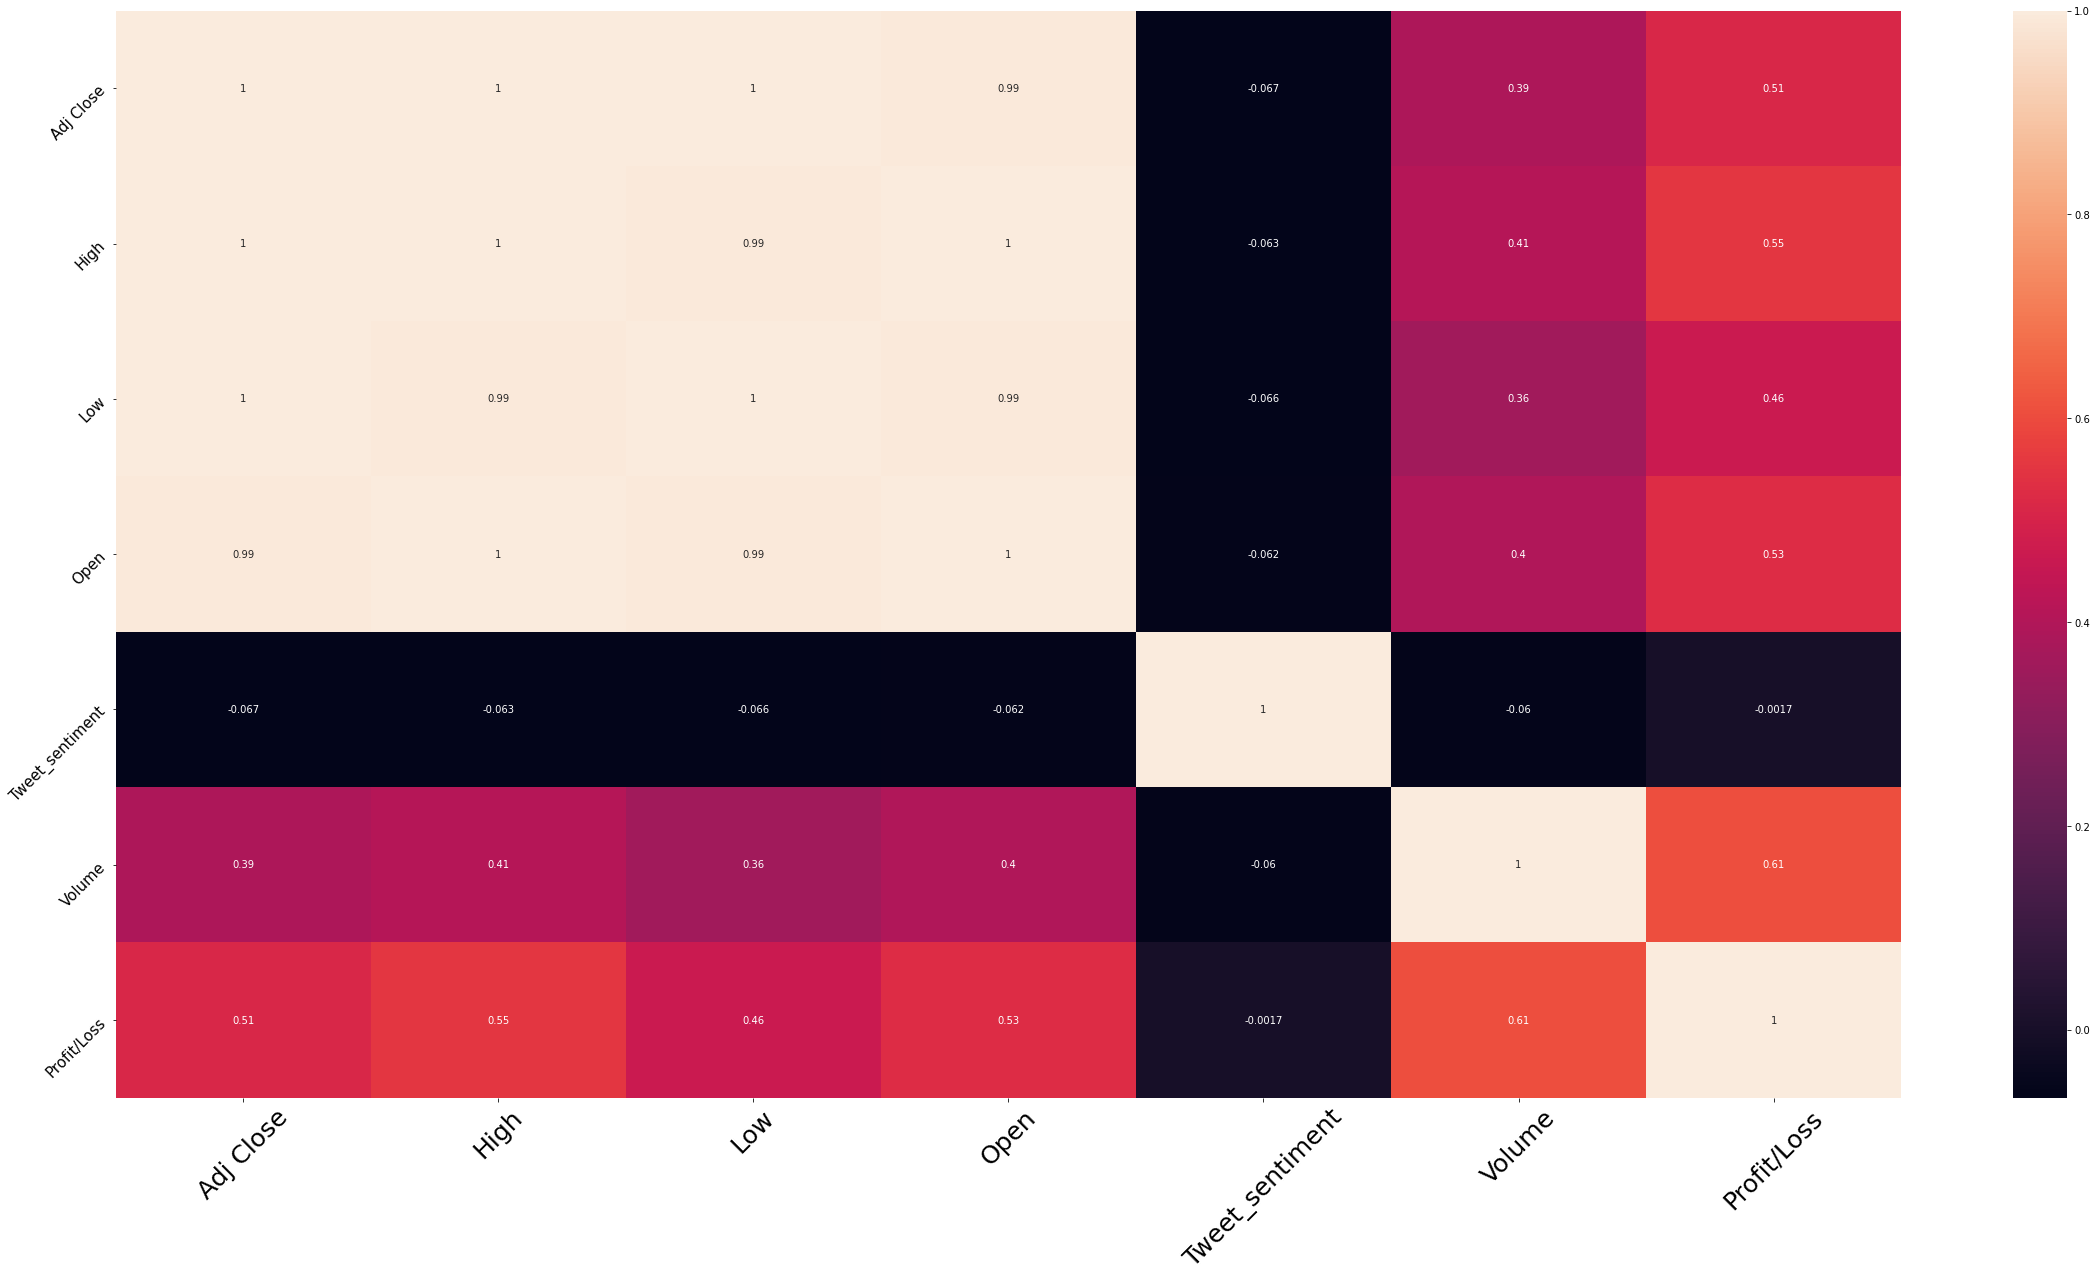

In [66]:
#Heatmap

_ = plt.figure(figsize=(40,20))
_ = sns.heatmap(BTCUSD.corr(), annot=True)
_ = plt.tick_params(labelsize=25, axis='x', labelrotation = 45)
_ = plt.tick_params(labelsize=15, axis='y', labelrotation = 45)

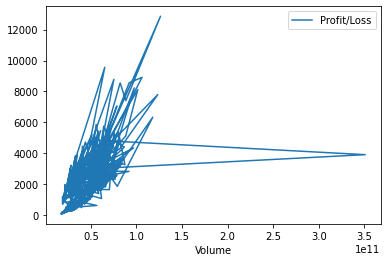

In [67]:
BTCUSD.plot(x='Volume', y='Profit/Loss')
plt.show()

<AxesSubplot:>

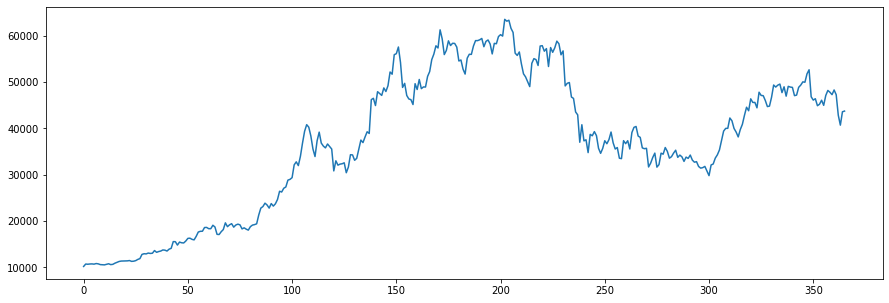

In [68]:
#print Adj Close  only
df['Adj Close'].plot(figsize=(15,5))

No handles with labels found to put in legend.


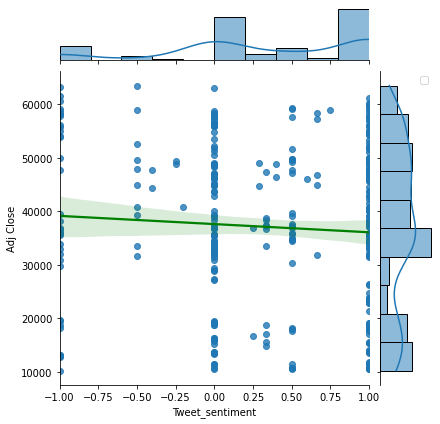

In [69]:
sns.jointplot(x='Tweet_sentiment', y='Adj Close',
                  data=df,
                  kind='reg',
                  joint_kws={'line_kws': {'color':'green'}})
plt.legend()
plt.show()

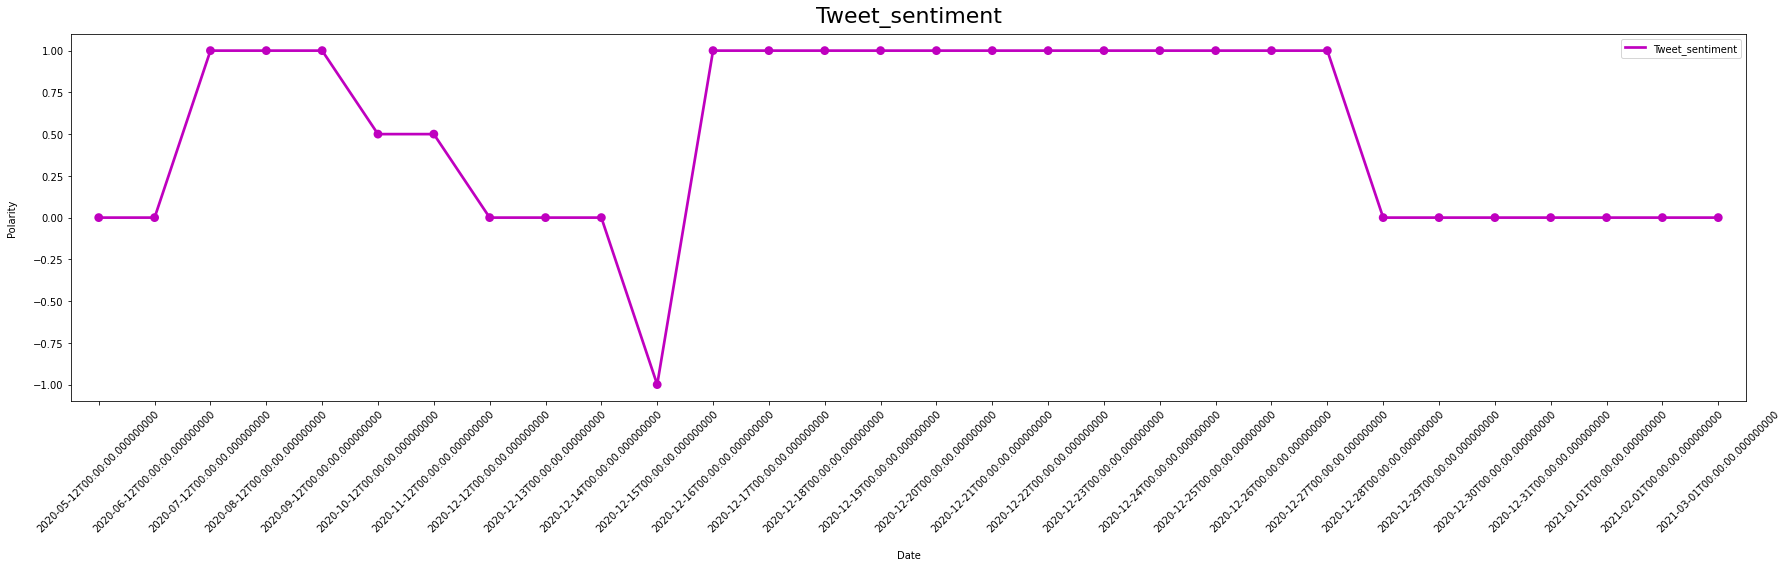

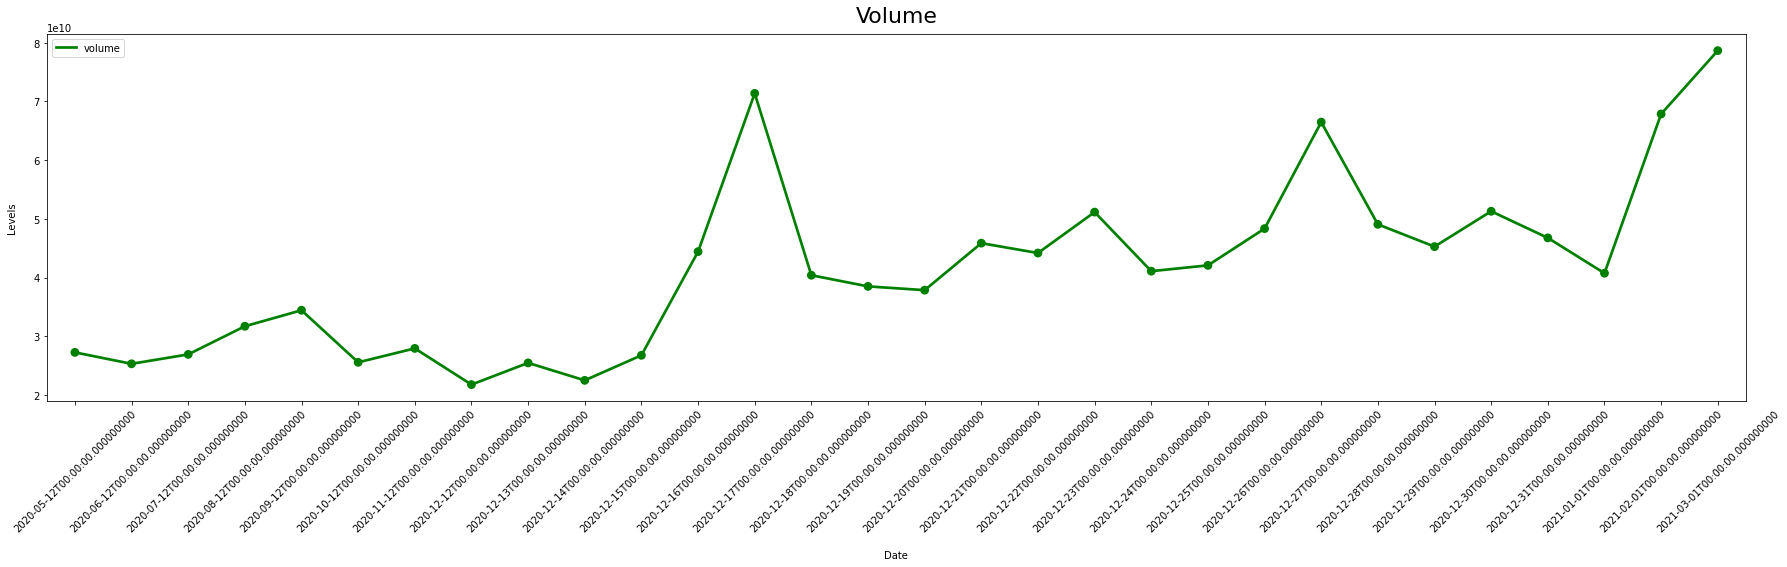

In [72]:
# Tweet Sentiment
df3=df[70:100]
fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df3, x='Date', y='Tweet_sentiment', color="m", label='Tweet_sentiment')

ax.legend(handles=ax.lines[::len(df3)+1], labels=["Tweet_sentiment"])
ax.set_title('Tweet_sentiment', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Polarity', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()

# Volume

fig, ax = plt.subplots(figsize=(25,8))
sns.pointplot(data=df3, x='Date', y='Volume', color="g", label='volume')

ax.legend(handles=ax.lines[::len(df3)+1], labels=["volume"])
ax.set_title('Volume', fontsize=22, y=1.015)
ax.set_xlabel('Date', labelpad=16)
ax.set_ylabel('Levels', labelpad=16)

t=plt.xticks(rotation=45)
plt.tight_layout()